ANN(Artificial Neural Network)


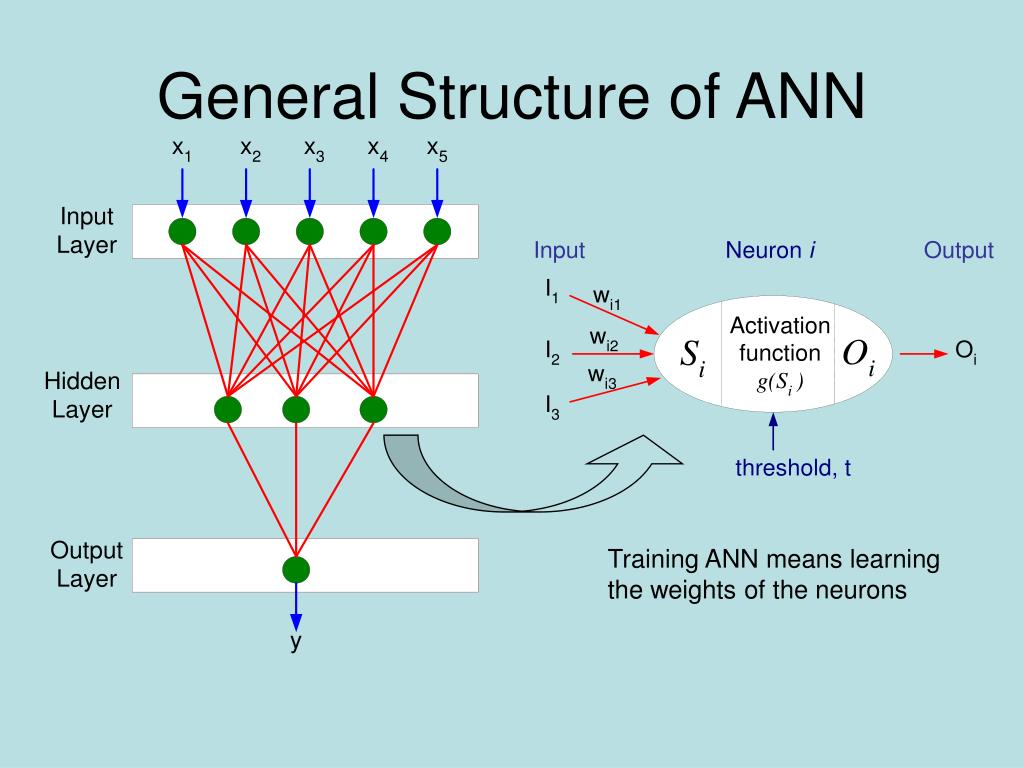

#### Things to learn in ANN
1. Sequential
2. Dense
3. Dropout Layer


1️⃣ Sequential

This refers to a model-building style in deep learning frameworks like Keras or PyTorch.


2️⃣ Dense Layer (a.k.a. Fully Connected Layer)

A Dense layer means every neuron is connected to every neuron in the previous layer.


:

🔹3. What is a Dropout Layer?

It’s a regularization layer used in neural networks to reduce overfitting.

During training, it randomly “drops out” (sets to zero) a fraction of the neurons’ outputs.

This forces the network not to rely too heavily on specific neurons, making it more robust.


One thing to keep in mind is Feature
Scaling.

Question1: For which all algorithm feature scaling is required?
Answer:
 1. Anything which is related to distance based.(because the value is bigger calculation will take more time. so we have to reduce it)

 2. whereas Gridient descent is involved.

 example: ANN,KNN,LR,LogR,Kmean etc



In [ ]:
import tensorflow as tf

In [ ]:
# import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df=pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
# divide datset into dependent and independent variables
X=df.iloc[:,3:13].values
y=df.iloc[:,13].values

In [ ]:
X = pd.DataFrame(X, columns=['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.8,3,1,0,113931.57
3,699,France,Female,39,1,0.0,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.1


In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
#label encoding the categorical column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['Geography']=le.fit_transform(X['Geography'])
X['Gender']=le.fit_transform(X['Gender'])

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.0,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.8,3,1,0,113931.57
3,699,0,0,39,1,0.0,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.1


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#feature Scaling using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [ ]:
X_train.shape

(8000, 10)

In [ ]:
# lets create ANN(artificial neural network)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#activation functions
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
#lets initialize ANN
classifier=Sequential()


In [ ]:
#add input layer
# unit =11 means 11 nodes/ 11 inputs
classifier.add(Dense(units=11,activation='relu'))


In [ ]:
# adding first hidden layer
classifier.add(Dense(units=6,activation='relu'))
# to use dropout to avoid overfitting
# it drop randomly 30% of the nodes
classifier.add(Dropout(0.3))

In [ ]:
#adding second hidden layer
classifier.add(Dense(units=4,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
#adding the output layer
classifier.add(Dense(units=1,activation='sigmoid')) # units=1 for binary classification


In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # defauul learning rate is 0.001

In [ ]:
# to use own learning rate
# import tensorflow
# tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
#Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=20,min_delta=0.000,verbose=1,mode='auto')

In [ ]:
model=classifier.fit(X_train,y_train,validation_split=.33,batch_size=10,epochs=100,callbacks=early_stop)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8411 - loss: 0.3973 - val_accuracy: 0.8425 - val_loss: 0.3856
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8488 - loss: 0.3793 - val_accuracy: 0.8372 - val_loss: 0.3924
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8519 - loss: 0.3790 - val_accuracy: 0.8436 - val_loss: 0.3847
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8453 - loss: 0.3940 - val_accuracy: 0.8395 - val_loss: 0.3860
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8530 - loss: 0.3757 - val_accuracy: 0.8417 - val_loss: 0.3821
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8479 - loss: 0.3880 - val_accuracy: 0.8459 - val_loss: 0.3748
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8531 - loss: 0.3764 - val_accuracy: 0.8455 - val_loss: 0.3780
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8587 - loss: 0.3771 - val_accu

In [ ]:
model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
# summery of the model
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           121 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 815 (3.19 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 544 (2.13 KB)

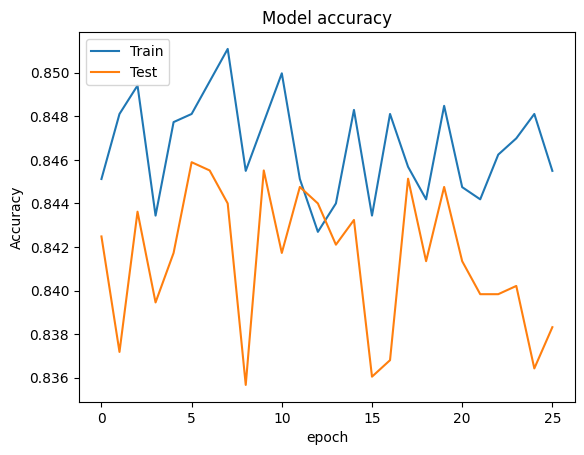

In [ ]:
# summery the history of accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

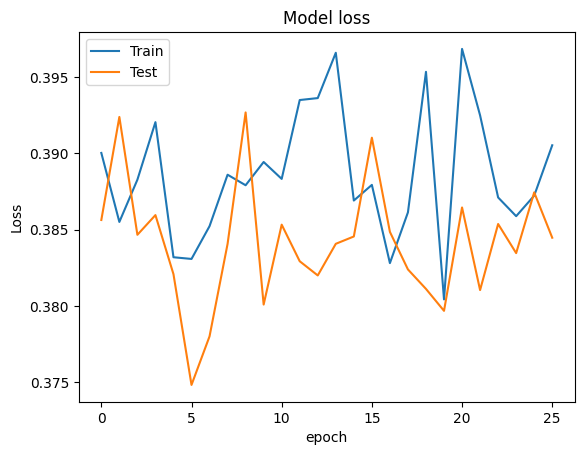

In [ ]:
#summery the history of loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[1567   28]
 [ 272  133]]
0.85


In [ ]:
#get the weights and bias
classifier.get_weights()

[array([[-0.01525324,  0.03755639,  0.24638179, -0.03587648, -0.15196854,
          0.15418783, -0.1589373 ,  0.19234672,  0.04898817,  0.06139387,
          0.09587722],
        [ 0.18099831,  0.20066021, -0.7208936 ,  0.48112243, -1.0592024 ,
         -0.20818096, -0.45845392,  0.22500384, -0.3843968 , -1.9835753 ,
          0.37545863],
        [-0.06458806,  0.43472964,  0.9450145 , -0.11817413, -0.19454518,
         -0.13021211,  0.28568956,  1.0329466 ,  0.01622488,  0.43522722,
         -0.00714999],
        [ 0.37782183,  0.40493268, -0.39165723, -1.0013676 , -1.782767  ,
         -0.9194504 , -0.52686304, -0.4356036 , -0.02304351, -0.23170084,
          0.16282737],
        [-0.26639155, -0.36896163,  0.5217445 ,  0.22905816, -0.26878422,
         -0.3816933 , -0.36339095,  0.09320284, -0.19078755,  0.15147442,
         -0.21948741],
        [ 0.01858126, -0.28263298, -1.1836364 ,  0.23833832, -0.49580097,
          0.16041759, -0.72952235, -0.4368877 , -0.18408367, -0.2642074

#### Question2: Black box model vs White box bodel

 White box:The internal logic is transparent and explainable — you can trace exactly how the model arrives at an output.

 Example: linear regression,decision tree

 Black box: The internal decision-making process is not easily interpretable by humans.

 Example:Random forest(many tree),ANN,Xgboost,CNN